In [8]:
!pip install pandas numpy requests matplotlib scikit-learn joblib


In [9]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [10]:
df = pd.read_csv(r"C:\Users\adars\Downloads\archive.zip")

In [11]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Disaster Type  Latitude  Longitude  Total Deaths  Total Affected  duration  \
0              0   52.6717    -0.2995         300.0          3000.0       0.0   
1              0   35.6897   139.6920        1379.0         13790.0       0.0   
2              0   39.9050   116.3910      100000.0       1000000.0       0.0   
3              0   23.1288   113.2590           0.0       3000000.0       0.0   
4              0   39.1467   117.2060           0.0        635000.0       0.0   

   time     Rainfall  Elevation      Slope  distance  occured  
0  1900  1383.125626       11.0   1.788207       0.0        1  
1  1909  1383.125626       49.0  24.356508       0.0        1  
2  1909   580.345856       55.0   8.374380       0.0        1  
3  1912  2993.401777        7.0  12.917221       0.0        1  
4  1913  1383.125626        3.0   1.513093       0.0        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 12 columns):
 #   Column          N

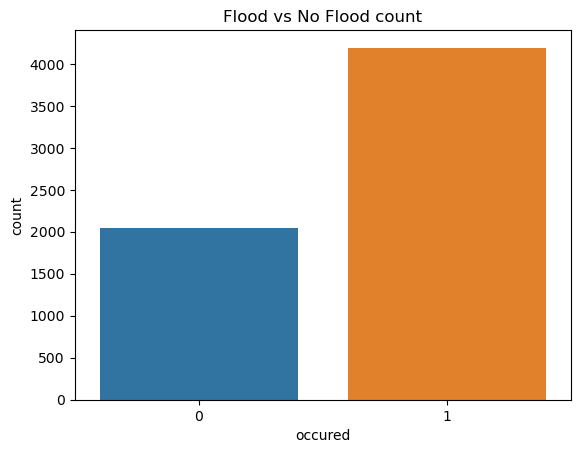

In [12]:
sns.countplot(x='occured', data=df)
plt.title("Flood vs No Flood count")
plt.show()


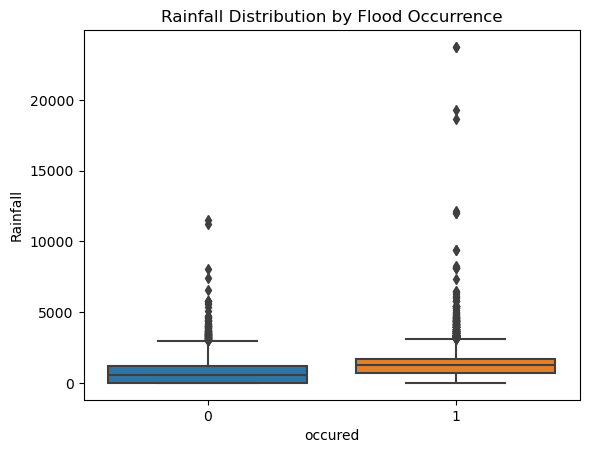

In [13]:

sns.boxplot(x='occured', y='Rainfall', data=df)
plt.title("Rainfall Distribution by Flood Occurrence")
plt.show()

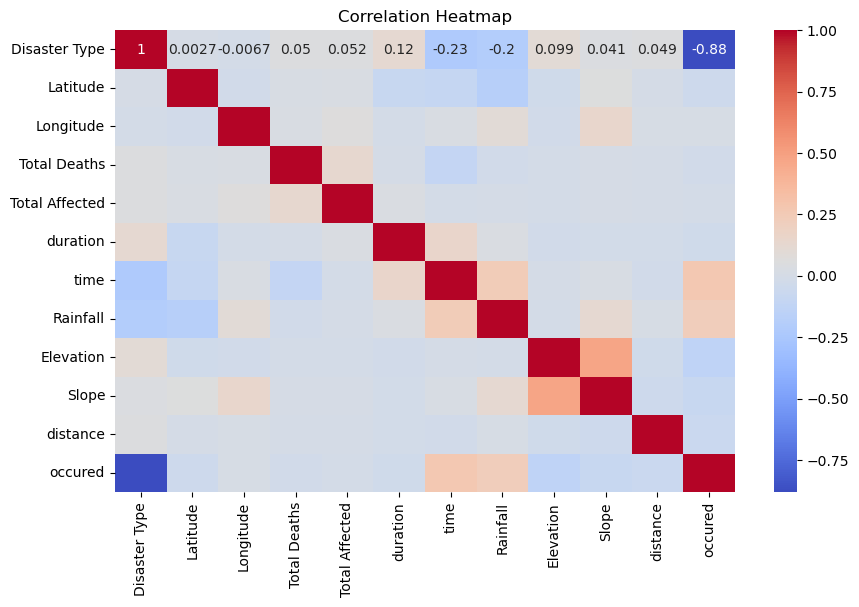

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
df = pd.get_dummies(df, columns=['Disaster Type'], drop_first=True)
features = ['Latitude', 'Longitude', 'Total Deaths', 'Total Affected', 
            'duration', 'Rainfall', 'Elevation', 'Slope', 'distance']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
print(df.head())
print(df.info())

   Latitude  Longitude  Total Deaths  Total Affected  duration  time  \
0  1.461141  -0.342869     -0.036219       -0.102169 -0.288995  1900   
1  0.729286   1.511990     -0.022223       -0.100794 -0.288995  1909   
2  0.910949   1.203257      1.257043        0.024880 -0.288995  1909   
3  0.187963   1.161758     -0.040111        0.279744 -0.288995  1912   
4  0.878269   1.214055     -0.040111       -0.021632 -0.288995  1913   

   Rainfall  Elevation     Slope  distance  occured  Disaster Type_1  \
0  0.156675  -0.693822 -0.600952 -0.063213        1            False   
1  0.156675  -0.649391  1.919501 -0.063213        1            False   
2 -0.532703  -0.642375  0.134599 -0.063213        1            False   
3  1.539482  -0.698500  0.641949 -0.063213        1            False   
4  0.156675  -0.703177 -0.631677 -0.063213        1            False   

   Disaster Type_2  Disaster Type_4  
0            False            False  
1            False            False  
2            False  

Feature Importances:
 Disaster Type_2    0.384875
Disaster Type_4    0.195759
Rainfall           0.154612
Disaster Type_1    0.140633
Total Deaths       0.024120
time               0.020898
Total Affected     0.018463
Elevation          0.014894
duration           0.012787
Longitude          0.012502
Latitude           0.008360
Slope              0.007323
distance           0.004773
dtype: float64


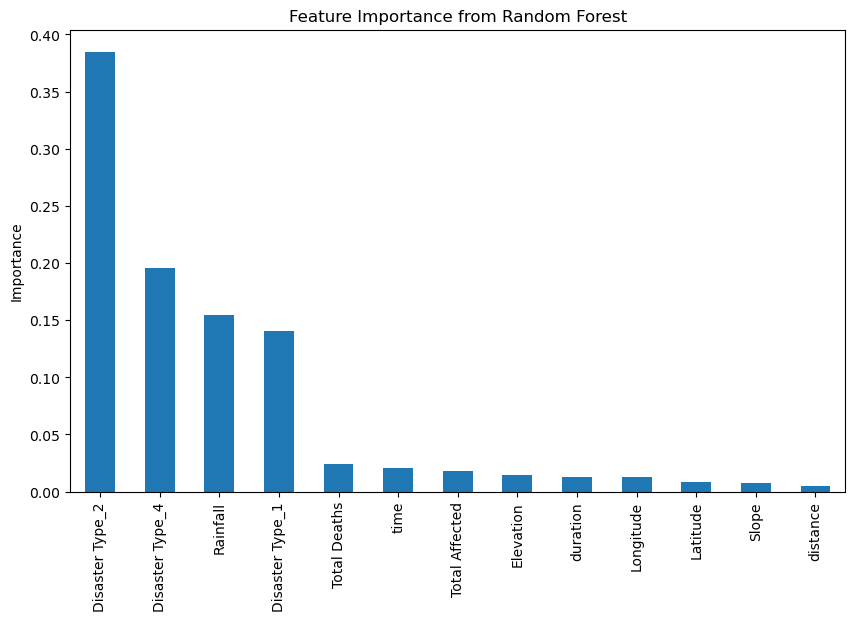

In [16]:
X = df.drop(columns=['occured'])   
y = df['occured']                  


rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)


importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("Feature Importances:\n", importances)

importances.plot(kind='bar', figsize=(10,6))
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.show()
